In [129]:
library(Seurat)
library(targets)
library(tidyverse)

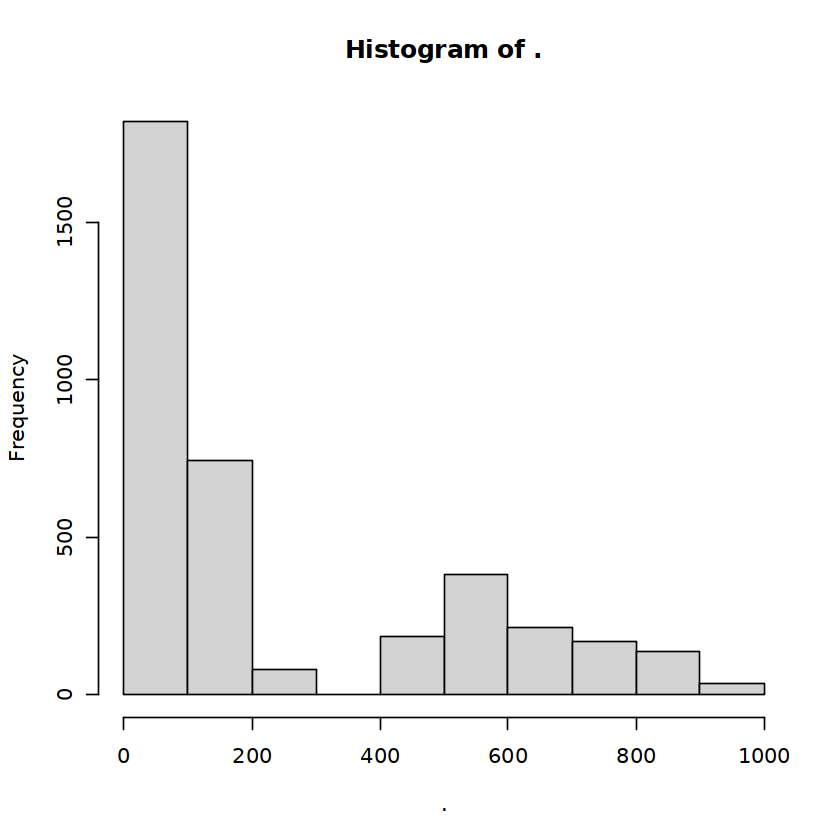

In [74]:
tar_meta() %>%
pull(seconds) %>% hist

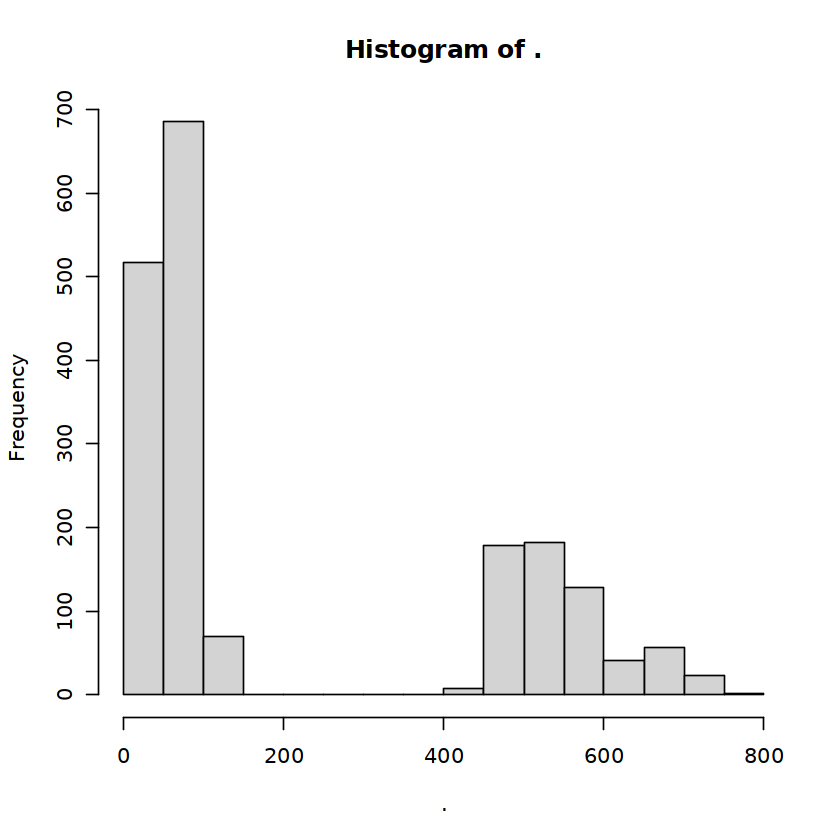

In [75]:
tar_meta() %>%
filter(!is.na(error)) %>%
pull(seconds) %>% hist

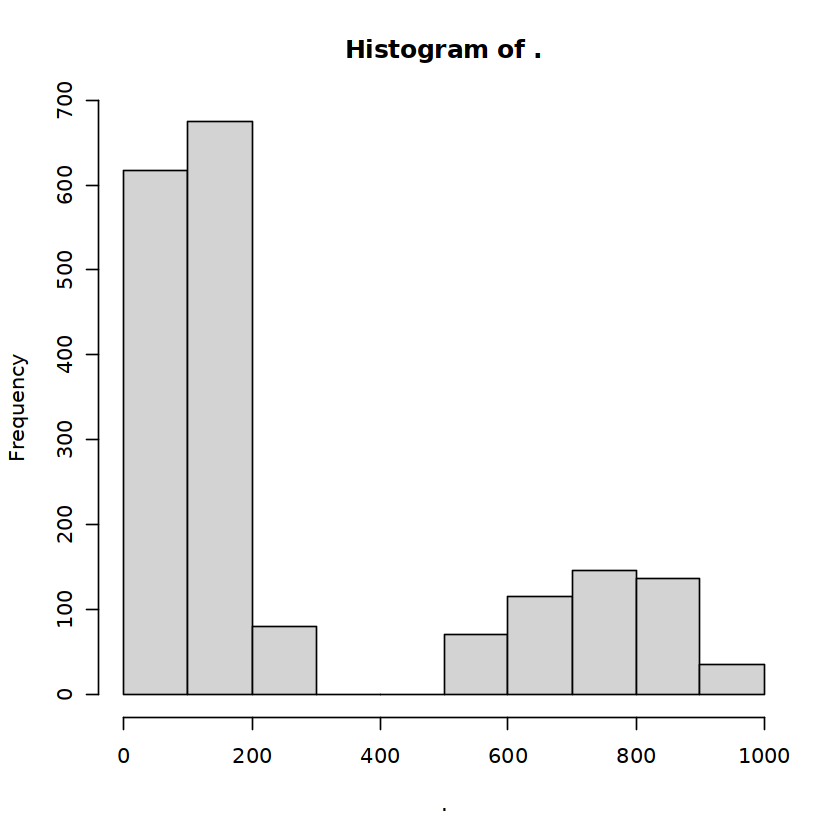

In [76]:
tar_meta() %>%
filter(is.na(error)) %>%
pull(seconds) %>% hist

In [51]:
tar_meta() %>% dim

[1] 830  18

In [52]:
tar_meta() %>% 
filter(is.na(error)) %>% dim

[1] 483  18

In [25]:
tar_meta() %>% select(time) %>% filter(time > as.POSIXct("2024-01-14")) %>% head %>% print

# A tibble: 6 × 1
  time               
  <dttm>             
1 2024-01-14 13:23:28
2 2024-01-14 13:24:39
3 2024-01-14 13:25:08
4 2024-01-14 13:25:10
5 2024-01-14 13:25:32
6 2024-01-14 13:25:32


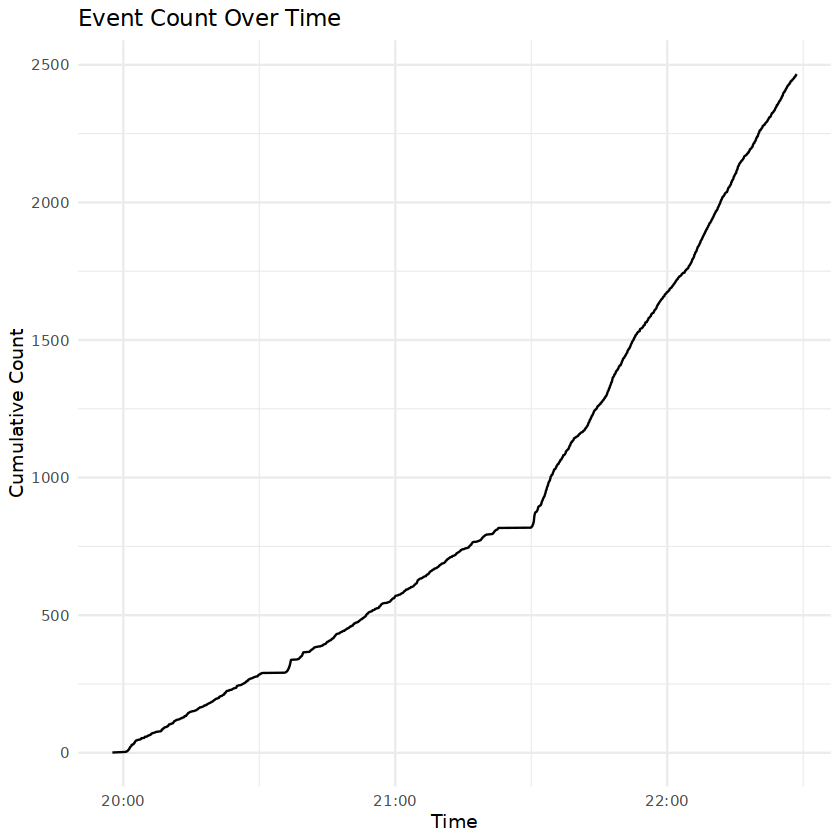

In [109]:
# Add a count column
data <- tar_meta() %>%
filter(time > as.POSIXct("2024-01-14 15:00:00")) %>%
  arrange(time) %>%
  mutate(count = row_number())

# Plotting
ggplot(data, aes(x = time, y = count)) +
  geom_line() +
  labs(title = "Event Count Over Time",
       x = "Time",
       y = "Cumulative Count") +
  theme_minimal()

In [103]:
library(lubridate)

filtered_data <- tar_meta() %>%
  filter(time >= as.POSIXct("2024-01-14 20:45:00") & time <= as.POSIXct("2024-01-14 20:58:00")) %>%
  arrange(time)

# Assuming linear behavior between the first and last points in this interval
start_point <- first(filtered_data)
end_point <- last(filtered_data)

# Calculate the slope
# Delta y
delta_y <- filtered_data %>% count

# Delta x in hours
delta_x <- as.numeric(difftime(end_point$time, start_point$time, units = "hours"))

# Slope
slope <- delta_y / delta_x

slope

n
<dbl>
691.9833


In [83]:
1600/ 538

[1] 2.973978

In [140]:
qs::qread('_targets/objects/combined_batchy_score_Day14.Astrocytes') %>%
filter(old.label == 'Day14.Astrocytes') %>%
filter(dims == 15) %>%
# filter(k.anchor == 5) %>%
# filter(k.weight == 50) %>%
# filter(nfeats == 5000) %>%
arrange(batchy_score) 

label,batchy_score,object,day,cluster,dims,k.anchor,k.weight,nfeats,batch,hash,old.label
<chr>,<dbl>,<list>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Day14.Astrocytes_2f0ce4eb9014fe2b2e3ac29abb532e13,9027.632,exp_labelled_other,Day14,Astrocytes,15,25,20,2000,batch,2f0ce4eb9014fe2b2e3ac29abb532e13,Day14.Astrocytes
Day14.Astrocytes_35bd8f33f199f476af143a23d68ed474,9027.632,exp_labelled_other,Day14,Astrocytes,15,25,20,10000,batch,35bd8f33f199f476af143a23d68ed474,Day14.Astrocytes
Day14.Astrocytes_e4eaab0b8fc29ada6f4e0a32c587d406,9027.632,exp_labelled_other,Day14,Astrocytes,15,25,20,5000,batch,e4eaab0b8fc29ada6f4e0a32c587d406,Day14.Astrocytes
Day14.Astrocytes_27eca2473f5cac7e549be50884f26210,11060.846,exp_labelled_other,Day14,Astrocytes,15,5,50,10000,batch,27eca2473f5cac7e549be50884f26210,Day14.Astrocytes
Day14.Astrocytes_a3652b1412adba17fd870f44483c70b8,11060.846,exp_labelled_other,Day14,Astrocytes,15,5,50,5000,batch,a3652b1412adba17fd870f44483c70b8,Day14.Astrocytes
Day14.Astrocytes_a66564db1d128747b9f223552a6f9aaf,11060.846,exp_labelled_other,Day14,Astrocytes,15,5,50,2000,batch,a66564db1d128747b9f223552a6f9aaf,Day14.Astrocytes
Day14.Astrocytes_390ed13fd6885586ac9b794e05b8be61,11120.459,exp_labelled_other,Day14,Astrocytes,15,5,20,2000,batch,390ed13fd6885586ac9b794e05b8be61,Day14.Astrocytes
Day14.Astrocytes_80aea5caad26ac4c6d527941d5b6aaab,11120.459,exp_labelled_other,Day14,Astrocytes,15,5,20,10000,batch,80aea5caad26ac4c6d527941d5b6aaab,Day14.Astrocytes
Day14.Astrocytes_a35438f47bc3283e02eb90d7bb14d784,11120.459,exp_labelled_other,Day14,Astrocytes,15,5,20,5000,batch,a35438f47bc3283e02eb90d7bb14d784,Day14.Astrocytes


In [143]:
obj = qs::qread('_targets/objects/obj_Day14.Astrocytes_2f0ce4eb9014fe2b2e3ac29abb532e13')
obj

An object of class Seurat 
18954 features across 7515 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

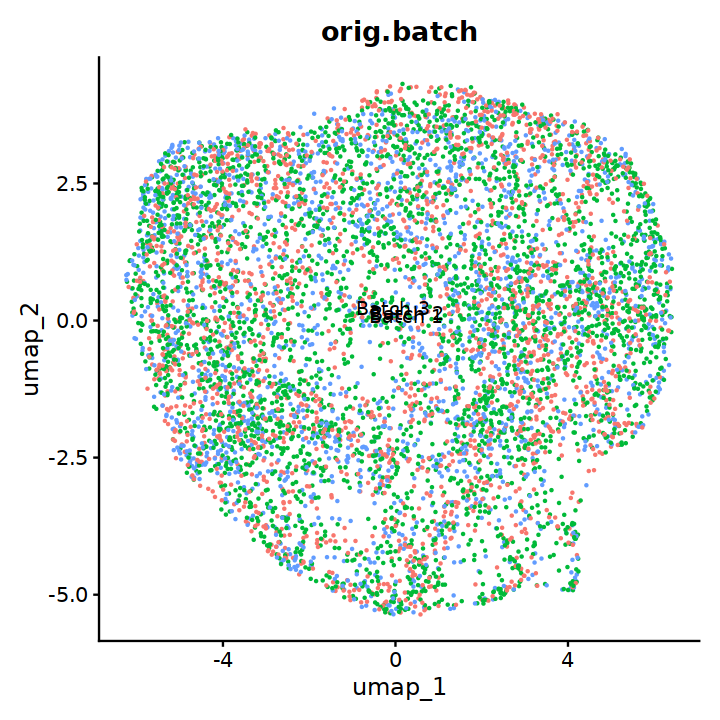

In [144]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='orig.batch', label=T) + NoLegend()

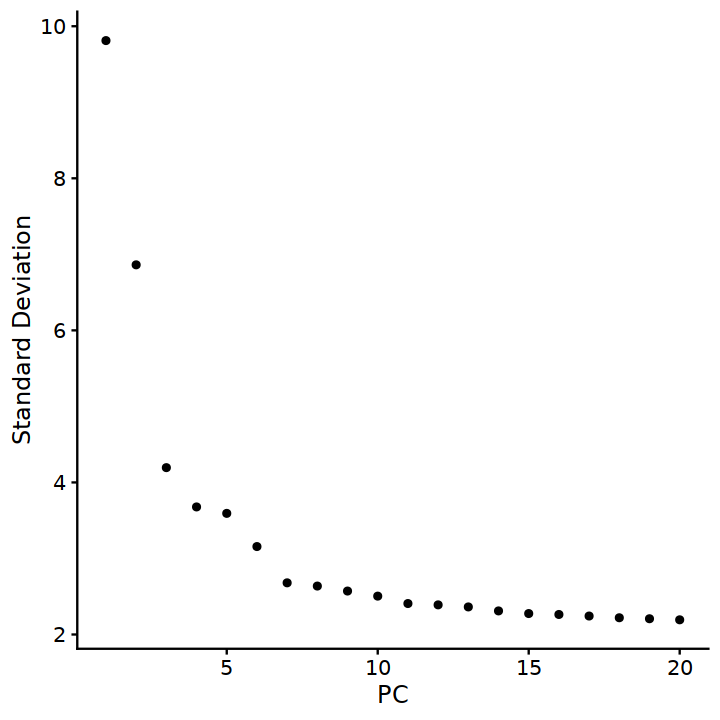

In [145]:
ElbowPlot(obj)

In [146]:
a = ElbowPlot(obj)

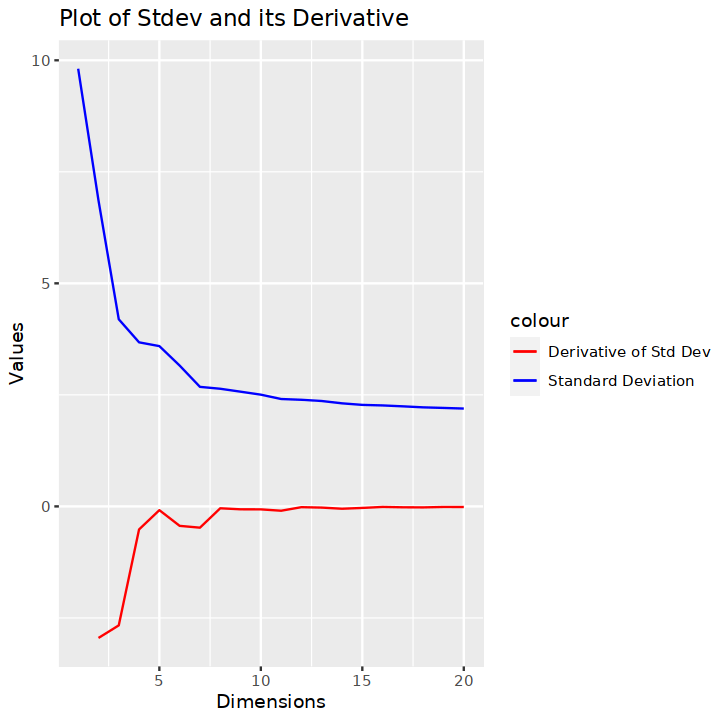

In [161]:
data <- a$data %>%
  mutate(deriv_stdev = c(NA, diff(stdev) / diff(dims)))

# Plotting the derivative and stdev on the same ggplot
ggplot(data, aes(x = dims)) +
  geom_line(aes(y = stdev, color = "Standard Deviation")) +
  geom_line(aes(y = deriv_stdev, color = "Derivative of Std Dev"), na.rm = TRUE) +
  labs(title = "Plot of Stdev and its Derivative",
       x = "Dimensions",
       y = "Values") +
  scale_color_manual(values = c("Standard Deviation" = "blue", "Derivative of Std Dev" = "red"))


In [163]:
obj %>%
ElbowPlot %>%
`$`('data') %>%
  arrange(dims) %>% # Ensure data is sorted by 'dims'
  mutate(deriv_stdev = c(NA, diff(stdev) / diff(dims)))

dims,stdev,deriv_stdev
<int>,<dbl>,<dbl>
1,9.811244,NA
2,6.861789,-2.94945472
3,4.194438,-2.66735058
4,3.677608,-0.51683060
5,3.593035,-0.08457272
6,3.156534,-0.43650068
7,2.679430,-0.47710423
8,2.636962,-0.04246829
9,2.571395,-0.06556680


In [156]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(pracma)

# Assuming your tibble is named 'data' and has columns 'dims' and 'stdev'
# data <- tibble(dims = ..., stdev = ...)

# Create an interpolation function for stdev as a function of dims
stdev_function <- function(x) approx(data$dims, data$stdev, x)$y

# Calculate the derivative at each point in dims
data <- data %>%
  arrange(dims) %>%
  mutate(deriv_stdev = sapply(dims, function(x) deriv(stdev_function, x)))

# Plotting the derivative and stdev on the same ggplot
ggplot(data, aes(x = dims)) +
  geom_line(aes(y = stdev, color = "Standard Deviation")) +
  geom_line(aes(y = deriv_stdev, color = "Derivative of Std Dev")) +
  labs(title = "Plot of Stdev and its Derivative",
       x = "Dimensions",
       y = "Values") +
  scale_color_manual(values = c("Standard Deviation" = "blue", "Derivative of Std Dev" = "red"))


ERROR: [1m[33mError[39m in `arrange()`:[22m
[1m[22m[36mℹ[39m In argument: `..1 = dims`.
[1mCaused by error:[22m
[33m![39m object 'dims' not found


In [151]:
data

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error,count
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>,<int>
exp_labelled_other,stem,e2a78d1f9c41b0f5,0bb7fd5489581a56,f4792a5c1163f4b4,325110449,NA,2024-01-14 19:57:35,6d39800187326413,1176466993,qs,local,vector,NA,NA,9.755,NA,NA,1
exp_labelled_neuron,stem,bf72b54e6f91513b,3a761bbe327c5b1d,9a2bd1656dd20ca4,-1098101500,NA,2024-01-14 19:58:59,0a1e9e0a35952a73,5693458025,qs,local,vector,NA,NA,26.554,NA,NA,2
obj_Day5.Astrocytes_04840fcc9a6fcd161d85d9ccc1c994d4,stem,887109d61f12781b,9632b98a018d8a96,cf67b9e681bf1ec1,-883088952,NA,2024-01-14 20:00:20,36b4bb2e4cfce561,225409675,qs,local,vector,NA,NA,148.514,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,3
obj_Day5.Astrocytes_5f1de089b8fd81775119c85c440501ed,stem,21dae7c2b93e6414,dfc49693326cce1b,cf67b9e681bf1ec1,2021058081,NA,2024-01-14 20:00:40,66223feb211811cf,223477080,qs,local,vector,NA,NA,144.605,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,4
obj_Day5.Astrocytes_db9060677a92dd2064b178bd7a11d074,stem,45770c9c165d5031,a578423ad080ba01,cf67b9e681bf1ec1,1996099680,NA,2024-01-14 20:00:41,d1070040183145f6,223594717,qs,local,vector,NA,NA,133.385,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,5
obj_Day5.Astrocytes_eff7b491fa03d46a7c2c5b8996cbffb5,stem,ee83095b31da8846,63acab8b256cc5b3,cf67b9e681bf1ec1,353186986,NA,2024-01-14 20:00:54,0250c0162a4aa9ce,224158774,qs,local,vector,NA,NA,157.051,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,6
obj_Day5.Astrocytes_83811226f301af62b0187e25ebc37c8b,stem,37ec894971b75fc1,df387a0306ab971b,cf67b9e681bf1ec1,-198049694,NA,2024-01-14 20:00:55,c395be0ca3c4e570,225207044,qs,local,vector,NA,NA,130.734,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,7
obj_Day5.Astrocytes_6ff28944a3198ba67f4a3cd5924b439b,stem,3aba340cb0657bdd,88d17684e702a5ef,cf67b9e681bf1ec1,-1368907100,NA,2024-01-14 20:00:58,70436fe6f05b3f8a,220650226,qs,local,vector,NA,NA,138.920,"Different cells in new layer data than already exists for scale.data. The default method for RunUMAP has changed from calling Python UMAP via reticulate to the Rnative UWOT using the cosine metricTo use Python UMAP via reticulate, set umap.method to umaplearn and metric to correlationThis message will be shown once per session",NA,8
obj_Day5.Astrocytes_1bea52876898e4d3cf686392d97b8aa7,stem,1181e34c61d1c43b,4e08718a80d6cc93,cf67b9e681bf1ec1,-2026860470,NA,2024-01-14 20:01:02,5d466333e014bd31,223533477,qs,local,vector,N